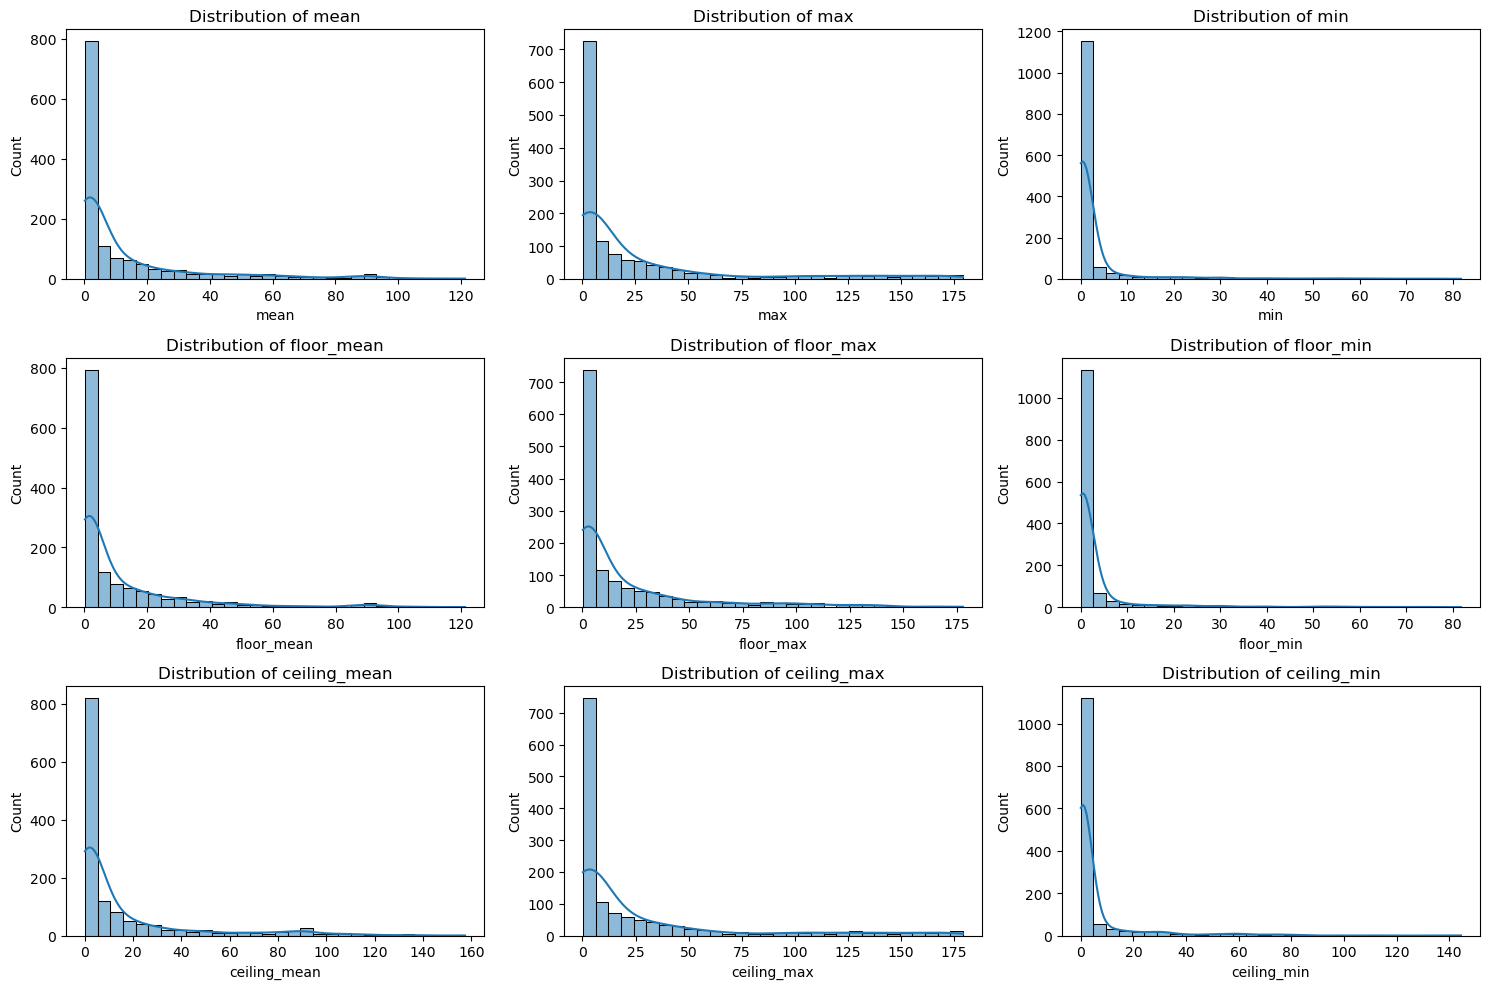

/tmp/ipykernel_172928/2507195287.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.df.corr()


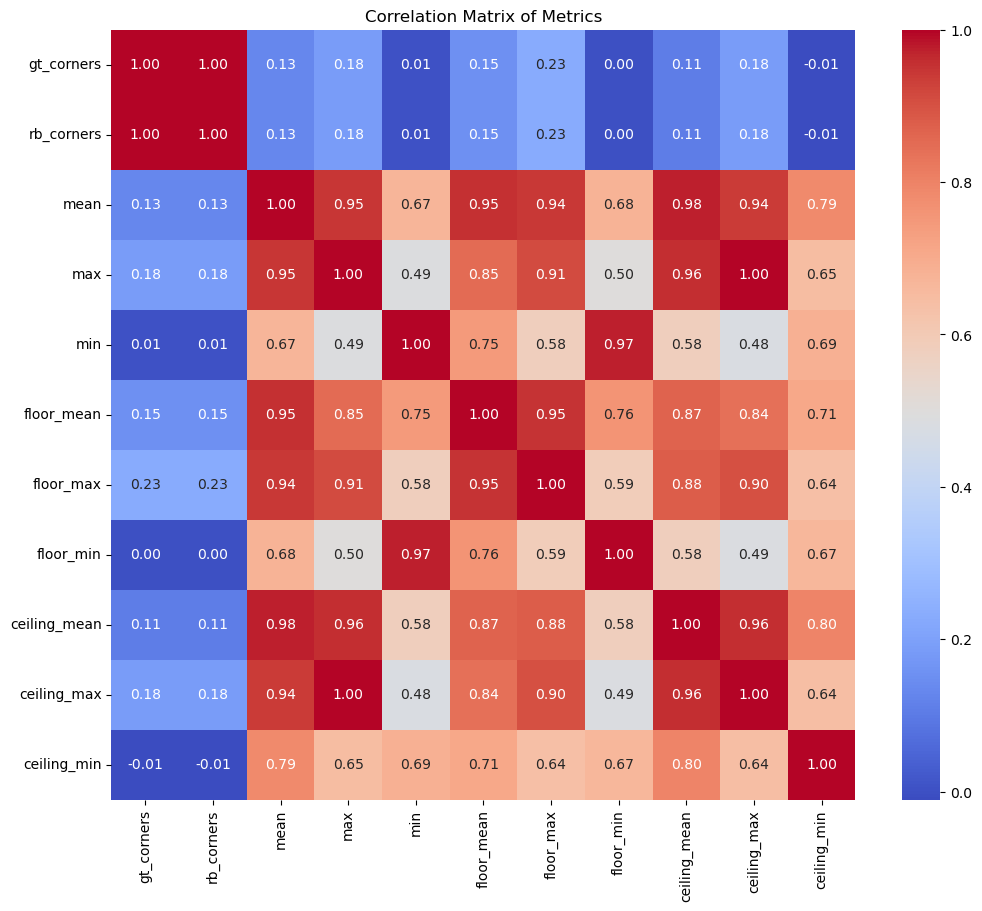

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

class PlotDrawer:
    def __init__(self, json_file):
        self.df = pd.read_json(json_file)
        self.plot_dir = Path("plots")
        self.plot_dir.mkdir(exist_ok=True)
        self.plot_paths = []

    def draw_plots(self):
        metrics = ['mean', 'max', 'min', 'floor_mean', 'floor_max', 'floor_min', 'ceiling_mean', 'ceiling_max', 'ceiling_min']

        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
        for ax, metric in zip(axes.flatten(), metrics):
            sns.histplot(self.df[metric], kde=True, bins=30, ax=ax)
            ax.set_title(f'Distribution of {metric}')
        plt.tight_layout()
        hist_path = self.plot_dir / "all_histograms.png"
        plt.show()
        plt.savefig(hist_path)
        self.plot_paths.append(hist_path)
        plt.close()

        corr_matrix = self.df.corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Metrics')
        heatmap_path = self.plot_dir / "correlation_heatmap.png"
        plt.show()
        plt.savefig(heatmap_path)
        self.plot_paths.append(heatmap_path)
        plt.close()
        

        sns.pairplot(self.df[metrics])
        pairplot_path = self.plot_dir / "pairplot.png"
        plt.show()
        plt.savefig(pairplot_path)
        self.plot_paths.append(pairplot_path)
        plt.close()

        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
        for ax, metric in zip(axes.flatten(), metrics):
            sns.kdeplot(self.df[metric], ax=ax)
            ax.set_title(f'Density Plot of {metric}')
        plt.tight_layout()
        density_path = self.plot_dir / "all_density_plots.png"
        plt.show()
        plt.savefig(density_path)
        self.plot_paths.append(density_path)
        plt.close()
        
        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
        for ax, metric in zip(axes.flatten(), metrics):
            ax.plot(self.df.index, self.df[metric], marker='o', linestyle='-')
            ax.set_title(f'Line Plot of {metric}')
            ax.set_xlabel('Index or Time')
            ax.set_ylabel(metric)
        plt.tight_layout()
        lineplot_path = self.plot_dir / "all_line_plots.png"
        plt.show()
        plt.savefig(lineplot_path)
        self.plot_paths.append(lineplot_path)
        plt.close()
        
        


        return self.plot_paths

plot_drawer = PlotDrawer('deviation.json')
plot_paths = plot_drawer.draw_plots()

